# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [9]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [10]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Terrible Experience with Bri...
1,✅ Trip Verified | An airline that lives in the...
2,✅ Trip Verified | Check-in Desk rude and dism...
3,✅ Trip Verified | I chose British Airways espe...
4,Not Verified | I booked Premium Economy from I...


In [11]:
df.to_csv(r"C:\Users\Nicole\Desktop\School Stuff\Forage\British Airways\BA_reviews.txt")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [12]:
dt = pd.read_csv("BA_reviews.txt", names=['ID','Reviews'], sep='|', skiprows=1)
del (dt['ID'])
dt = dt.dropna(axis=0)
dt = dt.reset_index(drop=True)
dt.head()

,Reviews
0,Terrible Experience with British Airways. I b...
1,An airline that lives in their past glory and...
2,Check-in Desk rude and dismissive. Flight la...
3,I chose British Airways especially because I ...
4,I booked Premium Economy from INV to LAX (via...


# Data Processing

In [50]:
# let's get rid of the punctuation
dt['Cleaned Reviews'] = dt['Reviews'].str.replace(r'[^\w\s]+', '')
dt['Cleaned Reviews'] = dt['Cleaned Reviews'].str.lower()
dt['Cleaned Reviews'] = dt['Cleaned Reviews'].str.replace('\d+', '')

C:\Users\Nicole\AppData\Local\Temp\ipykernel_7520\2798350910.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dt['Cleaned Reviews'] = dt['Reviews'].str.replace(r'[^\w\s]+', '')
C:\Users\Nicole\AppData\Local\Temp\ipykernel_7520\2798350910.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  dt['Cleaned Reviews'] = dt['Cleaned Reviews'].str.replace('\d+', '')


In [51]:
# use Vader for Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def vadersentimentanalysis(reviews):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(reviews)
    return sentiment['compound']

def analysis(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else: 
        return 'Neutral'

dt['Sentiment'] = dt['Cleaned Reviews'].apply(vadersentimentanalysis)
dt['Analysis'] = dt['Sentiment'].apply(analysis)
dt.head()

,Reviews,Cleaned Reviews,Sentiment,Analysis,filtered
0,Terrible Experience with British Airways. I b...,terrible experience with british airways i bo...,-0.4836,Negative,terrible experience british airways booked fli...
1,An airline that lives in their past glory and...,an airline that lives in their past glory and...,-0.8256,Negative,airline lives past glory heading future crisis...
2,Check-in Desk rude and dismissive. Flight la...,checkin desk rude and dismissive flight late...,-0.3818,Negative,checkin desk rude dismissive flight late seems...
3,I chose British Airways especially because I ...,i chose british airways especially because i ...,-0.9488,Negative,chose british airways especially going travel ...
4,I booked Premium Economy from INV to LAX (via...,i booked premium economy from inv to lax via ...,-0.9360,Negative,booked premium economy inv lax via lhr notifie...


In [52]:
vader_counts = dt['Analysis'].value_counts()
vader_counts

Negative    489
Positive    484
Neutral      26
Name: Analysis, dtype: int64

# Visual Representation

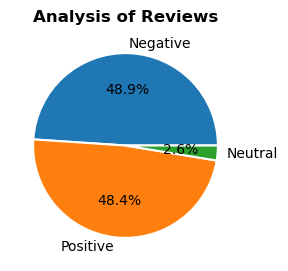

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.title('Analysis of Reviews', weight='bold')
wp = { 'linewidth' : 1.5, 'edgecolor' : "white" }
plt.pie(vader_counts.values, labels=vader_counts.index, wedgeprops=wp, autopct='%1.1f%%')
plt.show()

## WordCloud

In [71]:
# removing unimportant words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
custom_words = ['british airway', 'flight', 'ba', 'british airways']
total = stop_words + custom_words

dt['filtered'] = dt['Cleaned Reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (total)]))
dt['filtered'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nicole\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    terrible experience british airways booked tra...
1    airline lives past glory heading future crisis...
2    checkin desk rude dismissive late seems new no...
3    chose british airways especially going travel ...
4    booked premium economy inv lax via lhr notifie...
Name: filtered, dtype: object

In [75]:
# create a new dataframe for the positive reviews and negative review
dt_positive = dt[dt['Analysis'] == 'Positive']
dt_negative = dt[dt['Analysis'] == 'Negative']
dt_positive.index = pd.RangeIndex(start=0, stop=484, step=1)
dt_negative.index = pd.RangeIndex(start=0, stop=489, step=1)
dt_positive.head()
dt_negative.head()

,Reviews,Cleaned Reviews,Sentiment,Analysis,filtered
0,Terrible Experience with British Airways. I b...,terrible experience with british airways i bo...,-0.4836,Negative,terrible experience british airways booked tra...
1,An airline that lives in their past glory and...,an airline that lives in their past glory and...,-0.8256,Negative,airline lives past glory heading future crisis...
2,Check-in Desk rude and dismissive. Flight la...,checkin desk rude and dismissive flight late...,-0.3818,Negative,checkin desk rude dismissive late seems new no...
3,I chose British Airways especially because I ...,i chose british airways especially because i ...,-0.9488,Negative,chose british airways especially going travel ...
4,I booked Premium Economy from INV to LAX (via...,i booked premium economy from inv to lax via ...,-0.9360,Negative,booked premium economy inv lax via lhr notifie...


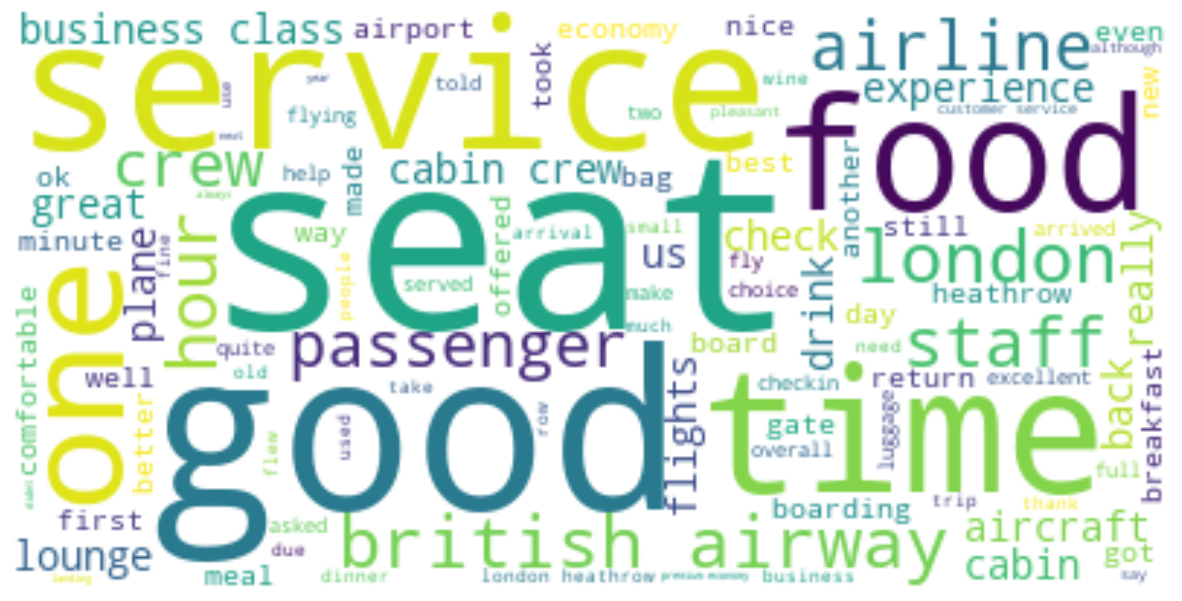

In [73]:
# generating positive wordcloud
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

text = " ".join(i for i in dt_positive.filtered)
stopwords = set(STOPWORDS)
wordcloud = WordCloud( stopwords=stopwords, background_color='white', max_words=100).generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

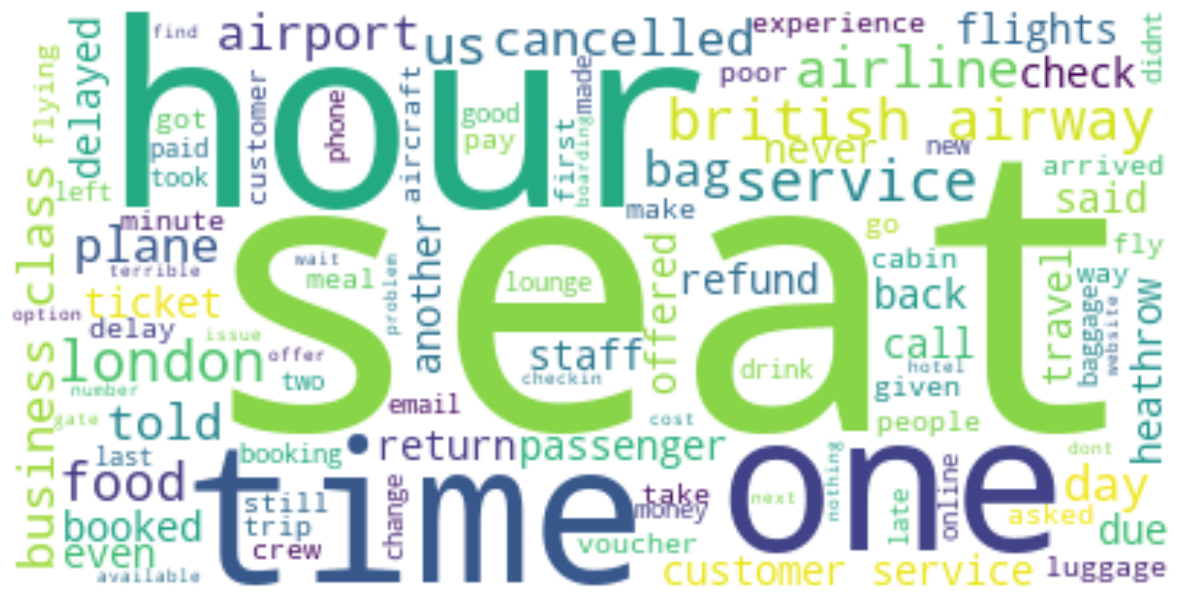

In [74]:
# generating negative wordcloud

text = " ".join(i for i in dt_negative.filtered)
stopwords = set(STOPWORDS)
wordcloud = WordCloud( stopwords=stopwords, background_color='white', max_words=100).generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()